In [1]:
import pandas as pd  #biblioteka za rad sa podacima

#u biblioteci sklearn su implementirane klase i funkcije za istrazivanje podataka
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree
from sklearn.model_selection import train_test_split
import sklearn.metrics as met  #modul metrics sadrzi f-je za evaluaciju modela za klasifikaciju


In [2]:
#ucitavanje podataka iz datoteke u csv formatu i
#pravljenje tabele, tj. objekta klase DataFrame

df=pd.read_csv('C:/Users/student/Desktop/ipIndustija4/ipVezbe62021/iris.csv')

Deo sa upoznavanjem i pripremom podataka


In [3]:
df.head()

Sepal_Length  Sepal_Width  Petal_Length  Petal_Width Species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

In [4]:
df.describe(include='all')

Sepal_Length  Sepal_Width  Petal_Length  Petal_Width    Species
count     150.000000   150.000000    150.000000   150.000000        150
unique           NaN          NaN           NaN          NaN          3
top              NaN          NaN           NaN          NaN  virginica
freq             NaN          NaN           NaN          NaN         50
mean        5.843333     3.057333      3.758000     1.199333        NaN
std         0.828066     0.435866      1.765298     0.762238        NaN
min         4.300000     2.000000      1.000000     0.100000        NaN
25%         5.100000     2.800000      1.600000     0.300000        NaN
50%         5.800000     3.000000      4.350000     1.300000        NaN
75%         6.400000     3.300000      5.100000     1.800000        NaN
max         7.900000     4.400000      6.900000     2.500000        NaN

In [5]:
#provera da li postoje nedostajuce vrednosti u skupu, jer ako
#postoje moraju biti obradjene
df.isna().any().any()

False

In [6]:
df.corr()
#posto je korelacija izmedju Petal_Width i Petal_Length 0.96,
#jedan od ova dva atributa se moze izostaviti pri pravljenju modela

Sepal_Length  Sepal_Width  Petal_Length  Petal_Width
Sepal_Length      1.000000    -0.117570      0.871754     0.817941
Sepal_Width      -0.117570     1.000000     -0.428440    -0.366126
Petal_Length      0.871754    -0.428440      1.000000     0.962865
Petal_Width       0.817941    -0.366126      0.962865     1.000000

Deo sa klasifikacijom


In [10]:
#Posto fja train_test_split kao prvi parametar prima opis instanci (bez ciljnog atributa),
#a kao drugi parametar listu sa klasama instanci koje su zadate kao prvi argument,
#ucitani skup se prema tim potrebama deli na dva dela

features = df.columns[:4].tolist()

In [11]:
#ako se eliminise jedan atribut zbog korelacije, npr. Petal_Length
#features.remove('Petal_Length')


In [12]:
features

['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width']

In [13]:
#features.remove('Petal_Length')

In [14]:
x=df[features] #opis instanci (skup sadrzi samo atribute koji se koriste za pravljenje modela)
y=df['Species'] #skup sa ciljnim atributom


In [15]:
"""
f-ja train_test_split kao rezultat vraca
    x_train: instance u trening skupu (bez ciljnog atributa)
    x_test: instance u test skupu (bez ciljnog atributa)
    y_train: klase instanci u trening skupu
    y_test: klase instanci u test skupu
"""

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=100)

In [16]:
#pravljenje klasifikatora koriscenjem klase DecisionTreeClassifier (u slajdovima je detaljnije opisana)

#dt = DecisionTreeClassifier()
#dt = DecisionTreeClassifier(criterion='entropy')
dt = DecisionTreeClassifier(max_depth=2)
#dt = DecisionTreeClassifier(min_samples_split=20, max_depth=4)
#dt = DecisionTreeClassifier(min_samples_split=20, max_depth=4, max_leaf_nodes=4)
#dt = DecisionTreeClassifier(min_impurity_split=0.05)


In [17]:
#pravljenje modela na osnovu trening skupa

dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [18]:
dt.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [20]:
dt.feature_importances_ 

array([0.        , 0.        , 0.56711176, 0.43288824])

In [21]:
pd.Series(dt.feature_importances_, index=features) 

Sepal_Length    0.000000
Sepal_Width     0.000000
Petal_Length    0.567112
Petal_Width     0.432888
dtype: float64

In [26]:
# pravljenje skupa koji sadrzi oznaku instance i
# verovatnocu pripadnosti svakoj od klasa
pd.DataFrame(dt.predict_proba(x_test),
                        index= x_test.index,
                        columns=['prob_' + x for x in dt.classes_])


prob_setosa  prob_versicolor  prob_virginica
79           0.0         0.888889        0.111111
26           1.0         0.000000        0.000000
27           1.0         0.000000        0.000000
3            1.0         0.000000        0.000000
61           0.0         0.888889        0.111111
103          0.0         0.031250        0.968750
41           1.0         0.000000        0.000000
67           0.0         0.888889        0.111111
81           0.0         0.888889        0.111111
148          0.0         0.031250        0.968750
45           1.0         0.000000        0.000000
9            1.0         0.000000        0.000000
35           1.0         0.000000        0.000000
55           0.0         0.888889        0.111111
121          0.0         0.031250        0.968750
100          0.0         0.031250        0.968750
44           1.0         0.000000        0.000000
80           0.0         0.888889        0.111111
22           1.0         0.000000        0.000000
58           0.0         0.888889        0.111111
113          0.0         0.031250        0.968750
59           0.0         0.888889        0.111111
125          0.0         0.031250        0.968750
40           1.0         0.000000        0.000000
4            1.0         0.000000        0.000000
114          0.0         0.031250        0.968750
87           0.0         0.888889        0.111111
136          0.0         0.031250        0.968750
32           1.0         0.000000        0.000000
130          0.0         0.031250        0.968750
5            1.0         0.000000        0.000000
17           1.0         0.000000        0.000000
131          0.0         0.031250        0.968750
99           0.0         0.888889        0.111111
90           0.0         0.888889        0.111111
116          0.0         0.031250        0.968750
11           1.0         0.000000        0.000000
43           1.0         0.000000        0.000000
71           0.0         0.888889        0.111111
138          0.0         0.031250        0.968750
119          0.0         0.888889        0.111111
54           0.0         0.888889        0.111111
72           0.0         0.888889        0.111111
48           1.0         0.000000        0.000000
82           0.0         0.888889        0.111111
13           1.0         0.000000        0.000000
63           0.0         0.888889        0.111111
62           0.0         0.888889        0.111111
123          0.0         0.031250        0.968750
144          0.0         0.031250        0.968750

In [27]:
from sklearn.tree import plot_tree

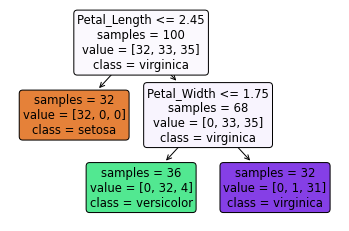

In [29]:
#graficki prikaz drveta
t=plot_tree(dt, rounded=True, filled=True, impurity=False, feature_names=features, class_names=dt.classes_ )

In [31]:
y_pred=dt.predict(x_train) #primena modela na trening podatke


In [32]:
met.accuracy_score(y_train, y_pred) #preciznost modela na trening skupu

0.95

In [34]:
#matrica konfuzije za trening skup
pd.DataFrame(met.confusion_matrix(y_train, y_pred), index=dt.classes_, columns=dt.classes_)

setosa  versicolor  virginica
setosa          32           0          0
versicolor       0          32          1
virginica        0           4         31

In [35]:
#izvestaj klasifikacije za trening skup
print(met.classification_report(y_train, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        32
  versicolor       0.89      0.97      0.93        33
   virginica       0.97      0.89      0.93        35

    accuracy                           0.95       100
   macro avg       0.95      0.95      0.95       100
weighted avg       0.95      0.95      0.95       100



In [36]:
#funkcija za primenu modela(clf) na podacima i ispis rezultata
def calculate_metrix(test_data, true_values, clf):
    y_pred=clf.predict(test_data)
    print('Preciznost:', met.accuracy_score(true_values, y_pred))
    print('Matrica kofuzije')
    print(pd.DataFrame(met.confusion_matrix(true_values, y_pred), index=clf.classes_, columns=clf.classes_))
    print('Izvestaj')
    print(met.classification_report(true_values, y_pred))

In [37]:
calculate_metrix(x_train, y_train, dt)

Preciznost: 0.95
Matrica kofuzije
            setosa  versicolor  virginica
setosa          32           0          0
versicolor       0          32          1
virginica        0           4         31
Izvestaj
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        32
  versicolor       0.89      0.97      0.93        33
   virginica       0.97      0.89      0.93        35

    accuracy                           0.95       100
   macro avg       0.95      0.95      0.95       100
weighted avg       0.95      0.95      0.95       100



In [38]:
calculate_metrix(x_test, y_test, dt) #primena modela na test podatke

Preciznost: 0.98
Matrica kofuzije
            setosa  versicolor  virginica
setosa          18           0          0
versicolor       0          17          0
virginica        0           1         14
Izvestaj
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        18
  versicolor       0.94      1.00      0.97        17
   virginica       1.00      0.93      0.97        15

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50

